In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = '/Users/dana/Documents/Pew Research Reading Project'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all3years.pkl'))

In [5]:
# Check for missing values

df.isnull().sum()

id                      0
year                    0
language                0
state                   0
sex                     0
age                     0
marital                 0
education               0
employment              0
hispanic                0
race                    0
income                  0
party                   0
number_of_books_read    0
read_printed_books      0
read_audiobooks         0
read_e-books            0
income_estimate         0
reader_category         0
generation              0
reading_type            0
education_group         0
employed                0
dtype: int64

In [6]:
dups = df.duplicated()

In [7]:
dups.shape # No dups

(5006,)

/Users/dana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_books_read', ylabel='Density'>

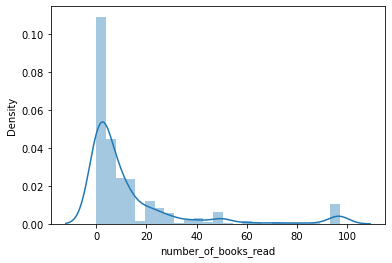

In [8]:
sns.distplot(df['number_of_books_read'], bins=25) # Shows extreme values

In [9]:
df['number_of_books_read'].mean() # Check the mean

13.50539352776668

In [10]:
df['number_of_books_read'].median() # Check the median

5.0

In [11]:
df['number_of_books_read'].max() # Check the max

97

In [12]:
# Hypothesis: The older a person is, the more they read.
# I already know this isn't true but I think I need continuous variables so I only have income or age.

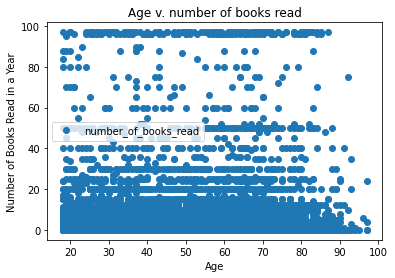

In [13]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'age', y='number_of_books_read',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age v. number of books read')  
plt.xlabel('Age')  
plt.ylabel('Number of Books Read in a Year')  
plt.show()

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['age'].values.reshape(-1,1)
y = df['number_of_books_read'].values.reshape(-1,1)

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
# Create a regression object.

regression = LinearRegression()

In [17]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

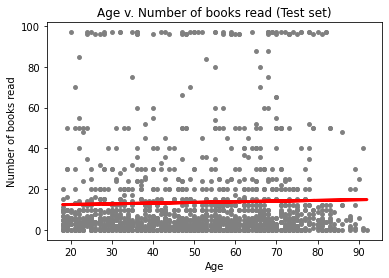

In [19]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age v. Number of books read (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Number of books read')
plot_test.show()

In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [21]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03351059]]
Mean squared error:  499.431906345364
R2 score:  0.001877048950129745


In [22]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,8,14.460265
1,2,13.287395
2,2,14.326223
3,0,14.761860
4,0,13.723032
5,0,14.024627
6,4,13.253884
7,6,13.153352
8,50,13.421437
9,0,12.751225


In [23]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [24]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [25]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03351059]]
Mean squared error:  487.40266474683284
R2 score:  0.0007855550939350753


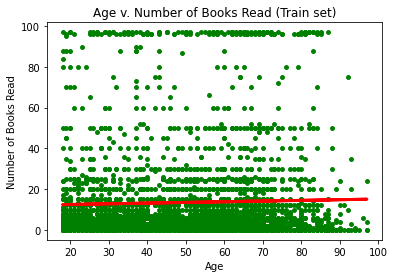

In [26]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age v. Number of Books Read (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Number of Books Read')
plot_test.show()